From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


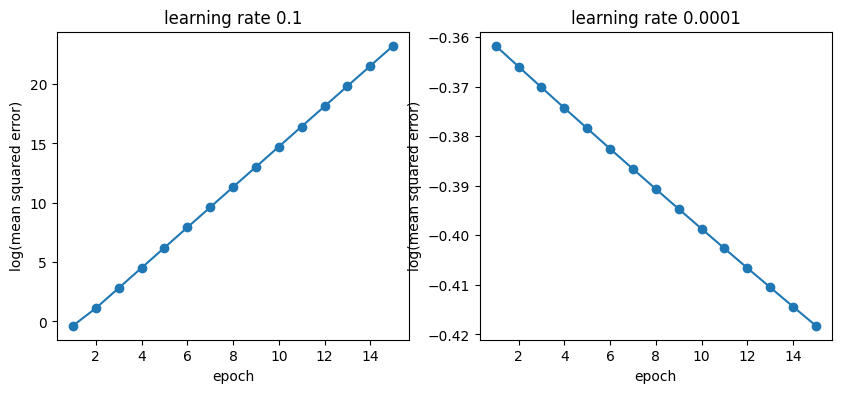

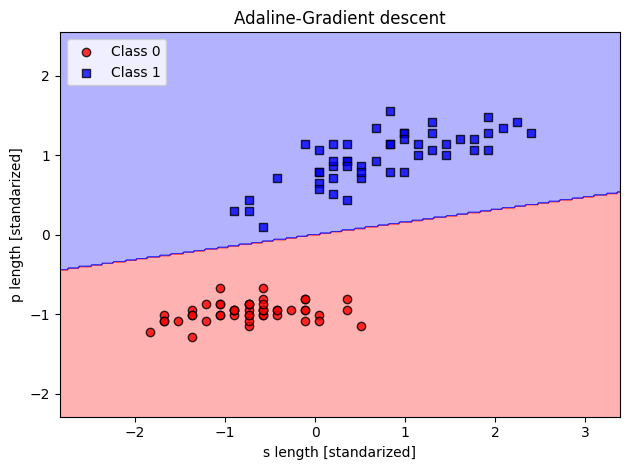

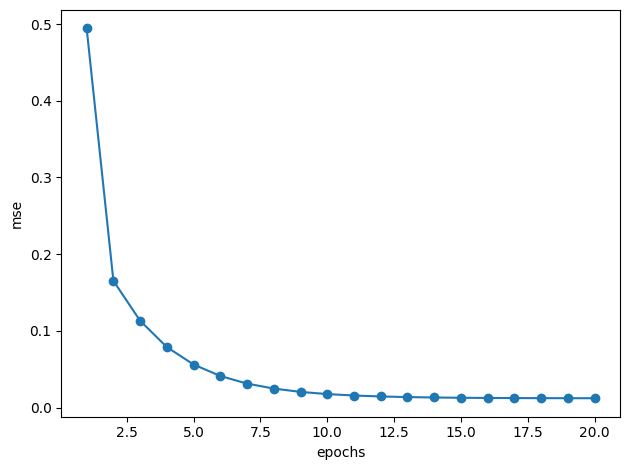

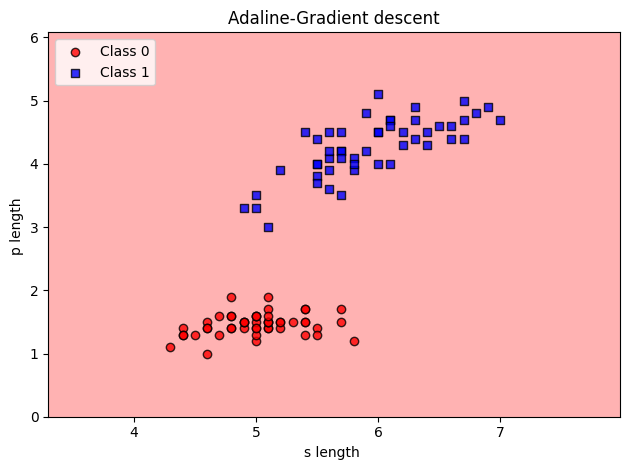

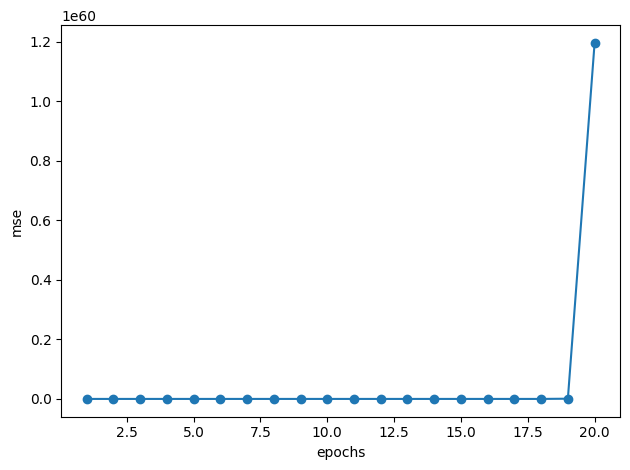

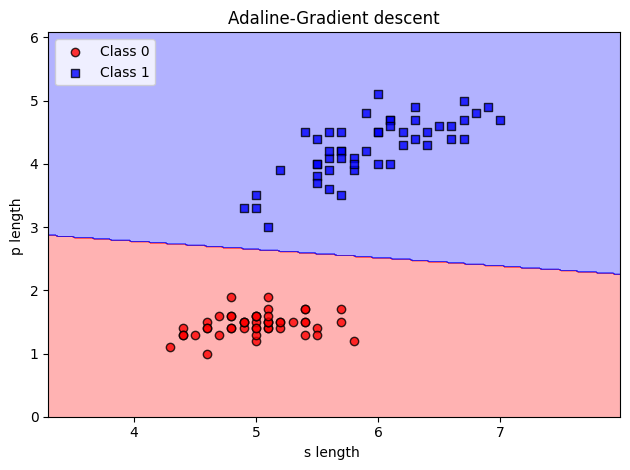

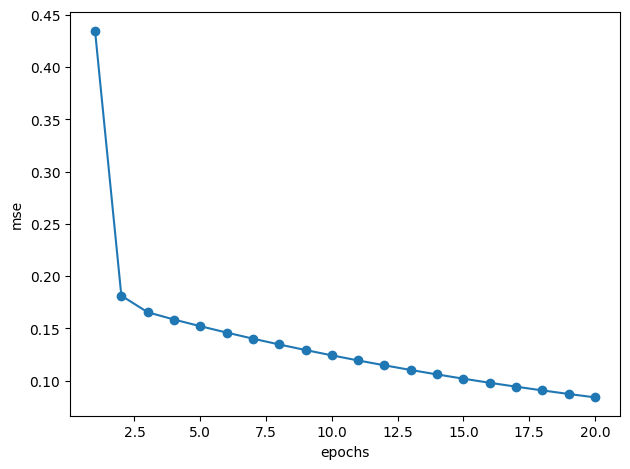

In [2]:
import matplotlib.pyplot as plt
import numpy as np
#import os
import pandas as pd
class AdalineGD:
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
        self.b_=np.float64(0.)
        self.losses_=[]
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=y-output
            self.w_+=self.eta*2*X.T.dot(errors)/X.shape[0]
            self.b_+=self.eta*2*errors.mean()
            loss=(errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_)+self.b_
    def activation(self,X):
        return X
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5,1,0)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
s='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:',s)
df=pd.read_csv(s,header=None,encoding='utf-8')
df.tail()
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',0,1)
X=df.iloc[0:100,[0,2]].values
ada1=AdalineGD(n_iter=15,eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1),np.log10(ada1.losses_),marker='o')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('log(mean squared error)')
ax[0].set_title('learning rate 0.1')
ada2=AdalineGD(n_iter=15,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1),np.log10(ada2.losses_),marker='o')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('log(mean squared error)')
ax[1].set_title('learning rate 0.0001')

from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=('o','s','^','v','<')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab=lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=f'Class {cl}',edgecolor='black')
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

plt.figure()
ada_gd=AdalineGD(n_iter=20,eta=0.5)
ada_gd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_gd)
plt.title('Adaline-Gradient descent')
plt.xlabel('s length [standarized]')
plt.ylabel('p length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada_gd.losses_)+1),ada_gd.losses_,marker='o')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.tight_layout()

plt.figure()
ada1=AdalineGD(n_iter=20,eta=0.5)
ada1.fit(X,y)
plot_decision_regions(X,y,ada1)
plt.title('Adaline-Gradient descent')
plt.xlabel('s length ')
plt.ylabel('p length ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada1.losses_)+1),ada1.losses_,marker='o')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.tight_layout()

plt.figure()
ada2=AdalineGD(n_iter=20,eta=0.01)
ada2.fit(X,y)
plot_decision_regions(X,y,ada2)
plt.title('Adaline-Gradient descent')
plt.xlabel('s length ')
plt.ylabel('p length ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada2.losses_)+1),ada2.losses_,marker='o')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.tight_layout()

In [5]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,